<div align="right">Revision 1A : March 2021</div>
<div align="left">Embedded Systems & IoT courses
<br>Instructor : Dr.Varodom Toochinda
<br>Dept. of Mechanical Engineering, Kasetsart University
</div>    

<a href="https://colab.research.google.com/github/dewdotninja/embedded_iot/blob/master/hws/hw3en_question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW # 3

First install and import the libraries used 

In [1]:
# For colab user, install additional libraries
!pip install slycot
!pip install control

     |████████████████████████████████| 1.6MB 16.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1417830 sha256=0fffa84208b121d87e3b1f3a34308cd286fea66a25d592b136b4adc39f958802
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot
     |████████████████████████████████| 348kB 16.1MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=82844f358909e944f335cabd186cc5f7d97ef18079580847ee58cf2b5811534d
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

The cell below contains step response data captured from a PID controller
$$
C(s) = K_p + \frac{K_i}{s} + \frac{NK_d}{1+N/s}
$$
with 3rd order lag plant
$$
P(s) = \frac{1}{(s+1)^3}
$$



In [3]:
datamat = np.array([
[0.06, 0.30, 0.10, 3.30],
[0.12, 0.30, 0.10, 2.64],
[0.18, 0.30, 0.10, 1.53],
[0.24, 0.30, 0.10, 1.34],
[0.30, 0.30, 0.10, 1.29],
[0.36, 0.30, 0.11, 1.17],
[0.42, 0.30, 0.11, 1.27],
[0.48, 0.30, 0.12, 1.16],
[0.54, 0.30, 0.12, 1.13],
[0.60, 0.30, 0.13, 1.05],
[0.66, 0.30, 0.14, 1.06],
[0.72, 0.30, 0.15, 0.98],
[0.78, 0.30, 0.16, 1.07],
[0.84, 0.30, 0.17, 0.92],
[0.90, 0.30, 0.18, 0.85],
[0.96, 0.30, 0.19, 0.76],
[1.02, 0.30, 0.20, 0.78],
[1.08, 0.30, 0.21, 0.70],
[1.14, 0.30, 0.22, 0.73],
[1.20, 0.30, 0.24, 0.61],
[1.26, 0.30, 0.25, 0.61],
[1.32, 0.30, 0.26, 0.50],
[1.38, 0.30, 0.27, 0.51],
[1.44, 0.30, 0.28, 0.40],
[1.50, 0.30, 0.30, 0.33],
[1.56, 0.30, 0.31, 0.31],
[1.62, 0.30, 0.32, 0.32],
[1.68, 0.30, 0.32, 0.35],
[1.74, 0.30, 0.34, 0.16],
[1.80, 0.30, 0.35, 0.18],
[1.86, 0.30, 0.35, 0.20],
[1.92, 0.30, 0.36, 0.17],
[1.98, 0.30, 0.37, 0.18],
[2.04, 0.30, 0.37, 0.10],
[2.10, 0.30, 0.38, 0.10],
[2.16, 0.30, 0.39, 0.04],
[2.22, 0.30, 0.39, 0.09],
[2.28, 0.30, 0.39, 0.08],
[2.34, 0.30, 0.40, 0.00],
[2.40, 0.30, 0.40, 0.06],
[2.46, 0.30, 0.40, 0.08],
[2.52, 0.30, 0.40, 0.06],
[2.58, 0.30, 0.40, 0.12],
[2.64, 0.30, 0.40, 0.05],
[2.70, 0.30, 0.40, 0.07],
[2.76, 0.30, 0.40, 0.12],
[2.82, 0.30, 0.40, 0.10],
[2.88, 0.30, 0.39, 0.16],
[2.94, 0.30, 0.39, 0.13],
[3.00, 0.30, 0.39, 0.17],
[3.06, 0.30, 0.38, 0.31],
[3.12, 0.30, 0.37, 0.22],
[3.18, 0.30, 0.37, 0.17],
[3.24, 0.30, 0.37, 0.29],
[3.30, 0.30, 0.36, 0.28],
[3.36, 0.30, 0.36, 0.24],
[3.42, 0.30, 0.35, 0.41],
[3.48, 0.30, 0.34, 0.33],
[3.54, 0.30, 0.34, 0.39],
[3.60, 0.30, 0.33, 0.43],
[3.66, 0.30, 0.32, 0.46],
[3.72, 0.30, 0.32, 0.44],
[3.78, 0.30, 0.31, 0.55],
[3.84, 0.30, 0.31, 0.45],
[3.90, 0.30, 0.30, 0.54],
[3.96, 0.30, 0.30, 0.56],
[4.02, 0.30, 0.30, 0.44],
[4.08, 0.30, 0.29, 0.58],
[4.14, 0.30, 0.28, 0.62],
[4.20, 0.30, 0.28, 0.50],
[4.26, 0.30, 0.28, 0.68],
[4.32, 0.30, 0.27, 0.63],
[4.38, 0.30, 0.27, 0.58],
[4.44, 0.30, 0.27, 0.60],
[4.50, 0.30, 0.27, 0.60],
[4.56, 0.30, 0.26, 0.63],
[4.62, 0.30, 0.26, 0.63],
[4.68, 0.30, 0.26, 0.64],
[4.74, 0.30, 0.26, 0.60],
[4.80, 0.30, 0.26, 0.62],
[4.86, 0.30, 0.26, 0.63],
[4.92, 0.30, 0.26, 0.59],
[4.98, 0.30, 0.26, 0.61],
[5.04, 0.30, 0.26, 0.62],
[5.10, 0.30, 0.26, 0.58],
[5.16, 0.30, 0.26, 0.56],
[5.22, 0.30, 0.27, 0.53],
[5.28, 0.30, 0.27, 0.62],
[5.34, 0.30, 0.27, 0.55],
[5.40, 0.30, 0.27, 0.53],
[5.46, 0.30, 0.27, 0.57],
[5.52, 0.30, 0.27, 0.60],
[5.58, 0.30, 0.28, 0.47],
[5.64, 0.30, 0.28, 0.44],
[5.70, 0.30, 0.28, 0.47],
[5.76, 0.30, 0.28, 0.55],
[5.82, 0.30, 0.29, 0.42],
[5.88, 0.30, 0.29, 0.40],
[5.94, 0.30, 0.29, 0.43],
[6.00, 0.30, 0.30, 0.40],
[6.06, 0.30, 0.30, 0.43],
[6.12, 0.30, 0.30, 0.49],
[6.18, 0.30, 0.30, 0.37],
[6.24, 0.30, 0.31, 0.36],
[6.30, 0.30, 0.31, 0.34],
[6.36, 0.30, 0.31, 0.40],
[6.42, 0.30, 0.31, 0.41],
[6.48, 0.30, 0.31, 0.41],
[6.54, 0.30, 0.31, 0.35],
[6.60, 0.30, 0.31, 0.40],
[6.66, 0.30, 0.32, 0.34],
[6.72, 0.30, 0.32, 0.31],
[6.78, 0.30, 0.32, 0.37],
[6.84, 0.30, 0.32, 0.38],
[6.90, 0.30, 0.32, 0.38],
[6.96, 0.30, 0.32, 0.30],
[7.02, 0.30, 0.32, 0.35],
[7.08, 0.30, 0.32, 0.33],
[7.14, 0.30, 0.32, 0.32],
[7.20, 0.30, 0.32, 0.34],
[7.26, 0.30, 0.32, 0.42],
[7.32, 0.30, 0.32, 0.39],
[7.38, 0.30, 0.32, 0.39],
[7.44, 0.30, 0.32, 0.36],
[7.50, 0.30, 0.32, 0.40],
[7.56, 0.30, 0.32, 0.42],
[7.62, 0.30, 0.32, 0.37],
[7.68, 0.30, 0.31, 0.41],
[7.74, 0.30, 0.31, 0.40],
[7.80, 0.30, 0.31, 0.42],
[7.86, 0.30, 0.31, 0.43],
[7.92, 0.30, 0.31, 0.39],
[7.98, 0.30, 0.31, 0.38],
[8.04, 0.30, 0.31, 0.38],
[8.10, 0.30, 0.31, 0.50],
[8.16, 0.30, 0.30, 0.44],
[8.22, 0.30, 0.30, 0.43],
[8.28, 0.30, 0.30, 0.46],
[8.34, 0.30, 0.30, 0.47],
[8.40, 0.30, 0.30, 0.48],
[8.46, 0.30, 0.30, 0.49],
[8.52, 0.30, 0.30, 0.42],
[8.58, 0.30, 0.30, 0.47],
[8.64, 0.30, 0.30, 0.44],
[8.70, 0.30, 0.30, 0.44],
[8.76, 0.30, 0.29, 0.49],
[8.82, 0.30, 0.29, 0.48],
[8.88, 0.30, 0.29, 0.43],
[8.94, 0.30, 0.29, 0.47],
[9.00, 0.30, 0.29, 0.48],
[9.06, 0.30, 0.29, 0.44],
[9.12, 0.30, 0.29, 0.50],
[9.18, 0.30, 0.29, 0.52],
[9.24, 0.30, 0.29, 0.48],
[9.30, 0.30, 0.29, 0.45],
[9.36, 0.30, 0.29, 0.49],
[9.42, 0.30, 0.29, 0.45],
[9.48, 0.30, 0.29, 0.47],
[9.54, 0.30, 0.29, 0.55],
[9.60, 0.30, 0.29, 0.45],
[9.66, 0.30, 0.29, 0.42],
[9.72, 0.30, 0.29, 0.46],
[9.78, 0.30, 0.29, 0.45],
[9.84, 0.30, 0.29, 0.49],
[9.90, 0.30, 0.29, 0.43],
[9.96, 0.30, 0.29, 0.46],
[10.02, 0.30, 0.29, 0.47],
[10.08, 0.30, 0.30, 0.40],
[10.14, 0.30, 0.30, 0.47],
[10.20, 0.30, 0.30, 0.44],
[10.26, 0.30, 0.30, 0.46],
[10.32, 0.30, 0.30, 0.46],
[10.38, 0.30, 0.30, 0.46],
[10.44, 0.30, 0.30, 0.47],
[10.50, 0.30, 0.30, 0.47],
[10.56, 0.30, 0.30, 0.47],
[10.62, 0.30, 0.30, 0.42],
[10.68, 0.30, 0.30, 0.45],
[10.74, 0.30, 0.30, 0.46],
[10.80, 0.30, 0.30, 0.41],
[10.86, 0.30, 0.30, 0.42],
[10.92, 0.30, 0.30, 0.49],
[10.98, 0.30, 0.30, 0.44],
[11.04, 0.30, 0.30, 0.47],
[11.10, 0.30, 0.30, 0.41],
[11.16, 0.30, 0.30, 0.39],
[11.22, 0.30, 0.30, 0.40],
[11.28, 0.30, 0.30, 0.45],
[11.34, 0.30, 0.30, 0.39],
[11.40, 0.30, 0.30, 0.40],
[11.46, 0.30, 0.31, 0.39],
[11.52, 0.30, 0.30, 0.44],
[11.58, 0.30, 0.30, 0.48],
[11.64, 0.30, 0.31, 0.37],
[11.70, 0.30, 0.30, 0.46],
[11.76, 0.30, 0.30, 0.41],
[11.82, 0.30, 0.30, 0.44],
[11.88, 0.30, 0.31, 0.38],
[11.94, 0.30, 0.31, 0.41],
[12.00, 0.30, 0.30, 0.46],
])


The rows of datamat array are the data points. Columns 0 - 3 are time, reference command, plant output, and controller 
output, respectively.

Write a function to compare responses between simulation and experimental data 

Your function should produce a step response comparison that looks like Figure 1

<p align="center">
<img src="https://drive.google.com/uc?id=1j4gDPQe_AaygVcKIE_YMevCOFGT_w_JK" alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 step response comparison</b></div>

<em>Hint : </em>Watch a video clip in Workshop 2 of the course github.

### Solution

In [4]:
def pid_compare(kp, ki, kd, datamat,scale=1):
    tvec = datamat[:,0]
    rvec = datamat[:,1]
    yvec = datamat[:,2]
    uvec = datamat[:,3]
    s = ctl.tf('s')
    # 3rd-order lag plant
    P = 1/((s+1)**3)
    # PID controller
    N = 20
    C_c = kp + ki/s +s*N*kd/(s+N)
    L_c = C_c*P
    sys_c = ctl.feedback(L_c)
    #simulate
    Tv, y_c = ctl.step_response(sys_c, tvec, X0=0.1/scale)
    # plot the comparison
    fig, (ax1, ax2) = plt.subplots(2,figsize=(12,12))
    #fig.suptitle('Step response comparison')
    ax1.set_title('Step response comparison')
    ax1.plot(tvec, rvec, 'g-.', tvec, scale*y_c, 'b-', tvec, yvec, 'r-')
    #ax1.set_xlabel('time (sec))
    ax1.set_ylabel('$y(t)$ (volts)')
    ax1.legend(['ref.cmd', 'simulated plant output', 'experimental plant output'])
    ax1.grid(True)
    ax2.plot(tvec, uvec, 'm-')
    ax2.set_xlabel(':time (sec)')
    ax2.set_ylabel('$u(t)$ (volts)')
    ax2.grid(True)
    ax2.set_title('Controller output')
    plt.show()

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:703: UserWarning: Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.
  "Non-zero initial condition given for transfer function system. "


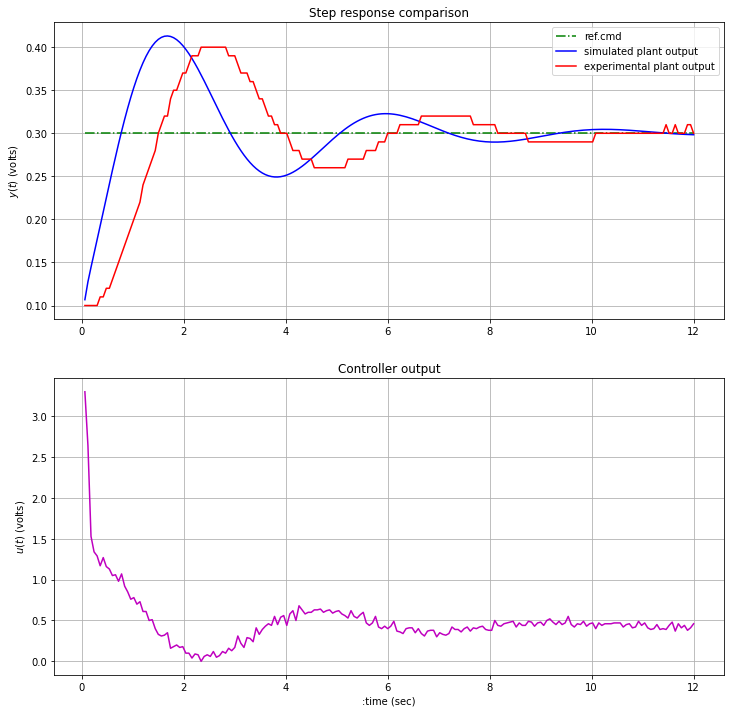

In [5]:
# invoke the function to create a plot
kp = 4.8
ki = 2.74
kd = 2.1
pid_compare(kp,ki,kd,datamat,scale=0.3)